<a href="https://colab.research.google.com/github/NivedhaLakshmi/SC1015-Mini-Project/blob/main/GroupProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Air travel demand is always expected to increase during the holiday season as many of them plan for overseas vacations. Usually, there could be many option to fly to a destination. As this is a competitive industry, it is important for any airline to know what are the customer expectations from pre-flight to post-flight. The model which we build can help to predict the significant aspects that lead to customer satisfaction.

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [ ]:
AirlineData = pd.read_csv('gdrive/My Drive/Colab Notebooks/airline_passenger_satisfaction.csv')
AirlineData.head()
df = pd.DataFrame(AirlineData)
# Drop unnecessary column
AirlineData = AirlineData.drop('ID', axis=1)

In [ ]:
AirlineData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Gender                                  129880 non-null  object 
 1   Age                                     129880 non-null  int64  
 2   Customer Type                           129880 non-null  object 
 3   Type of Travel                          129880 non-null  object 
 4   Class                                   129880 non-null  object 
 5   Flight Distance                         129880 non-null  int64  
 6   Departure Delay                         129880 non-null  int64  
 7   Arrival Delay                           129487 non-null  float64
 8   Departure and Arrival Time Convenience  129880 non-null  int64  
 9   Ease of Online Booking                  129880 non-null  int64  
 10  Check-in Service                        1298

<Axes: ylabel='Satisfaction'>

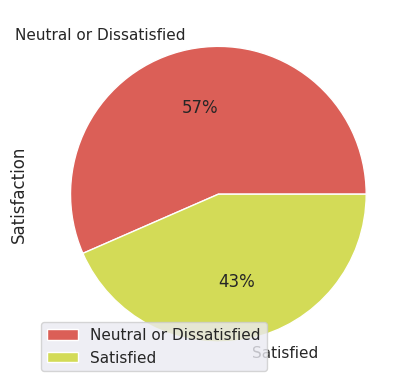

In [ ]:
AirlineData["Satisfaction"].value_counts(dropna=False).plot(kind="pie", autopct='%1.0f%%', colors=sb.color_palette("hls"), legend = True) 

<Axes: ylabel='Gender'>

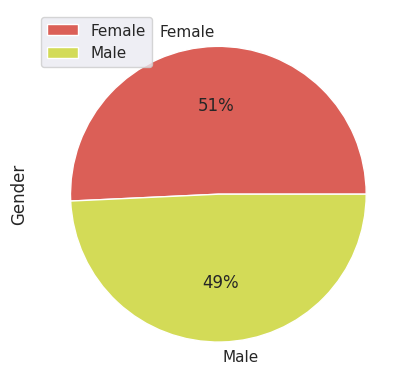

In [ ]:
AirlineData["Gender"].value_counts(dropna=False).plot(kind="pie", autopct='%1.0f%%', colors=sb.color_palette("hls"), legend = True) 

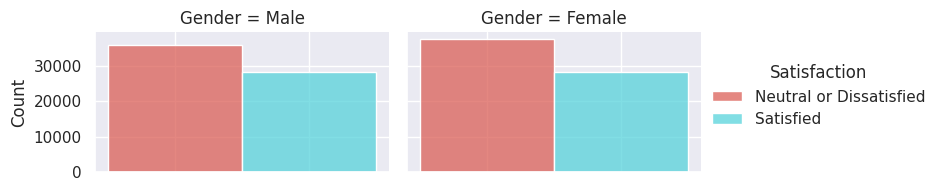

In [ ]:
g = sb.FacetGrid(AirlineData, col="Gender", height = 2.5, aspect = 1.5, hue ="Satisfaction", palette = 'hls')
g.map_dataframe(sb.histplot, x="Satisfaction")
g.set(xticklabels=[])  
g.set(xlabel=None)
g.add_legend()

As we are analysing the customer satisfaction. We are checking the distribution of the survey. Based on the graph, the survey is balanced and its not biased. Hence, no modification to the data is required.

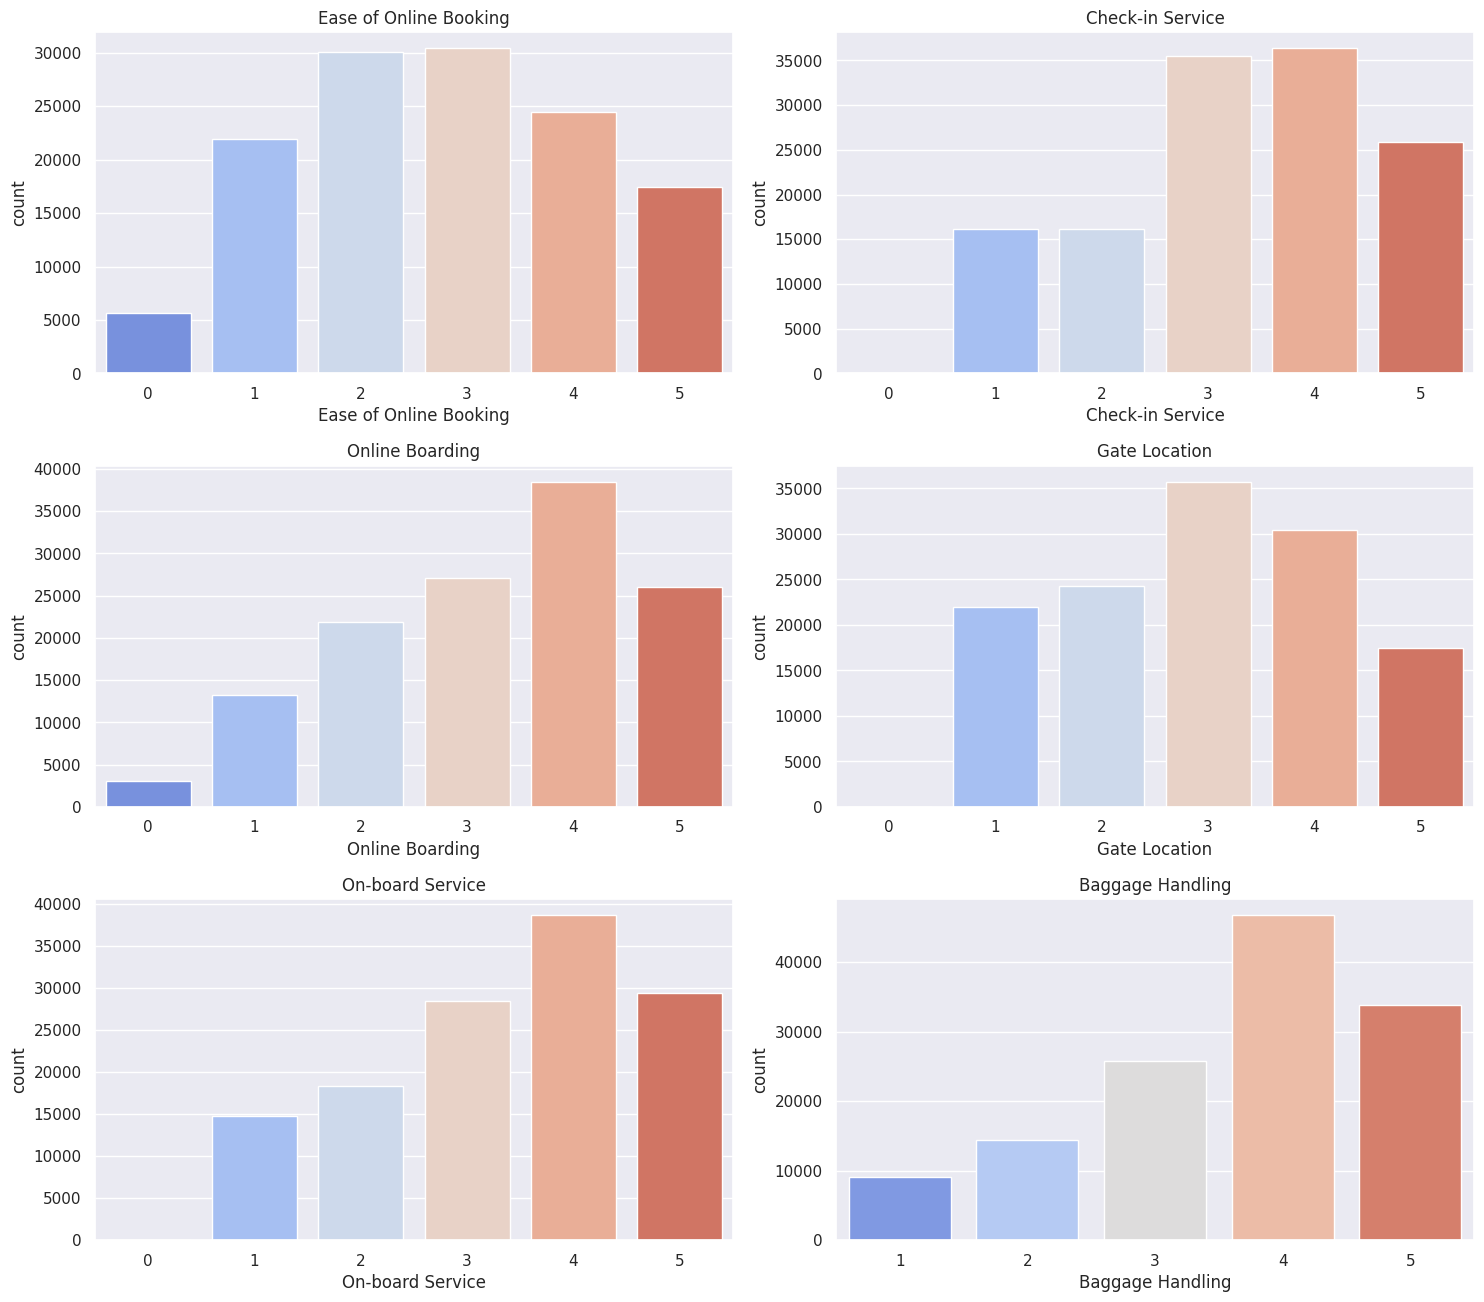

In [ ]:
continues = ['Ease of Online Booking', 'Check-in Service', 'Online Boarding', 'Gate Location', 'On-board Service', 'Baggage Handling']
plt.figure(figsize=(15,30))

for i in range(len(continues)):
        plt.subplot(7,2,i+1)
        plt.title(continues[i])
        sb.countplot(x=df[continues[i]], palette = 'coolwarm')    

plt.tight_layout()

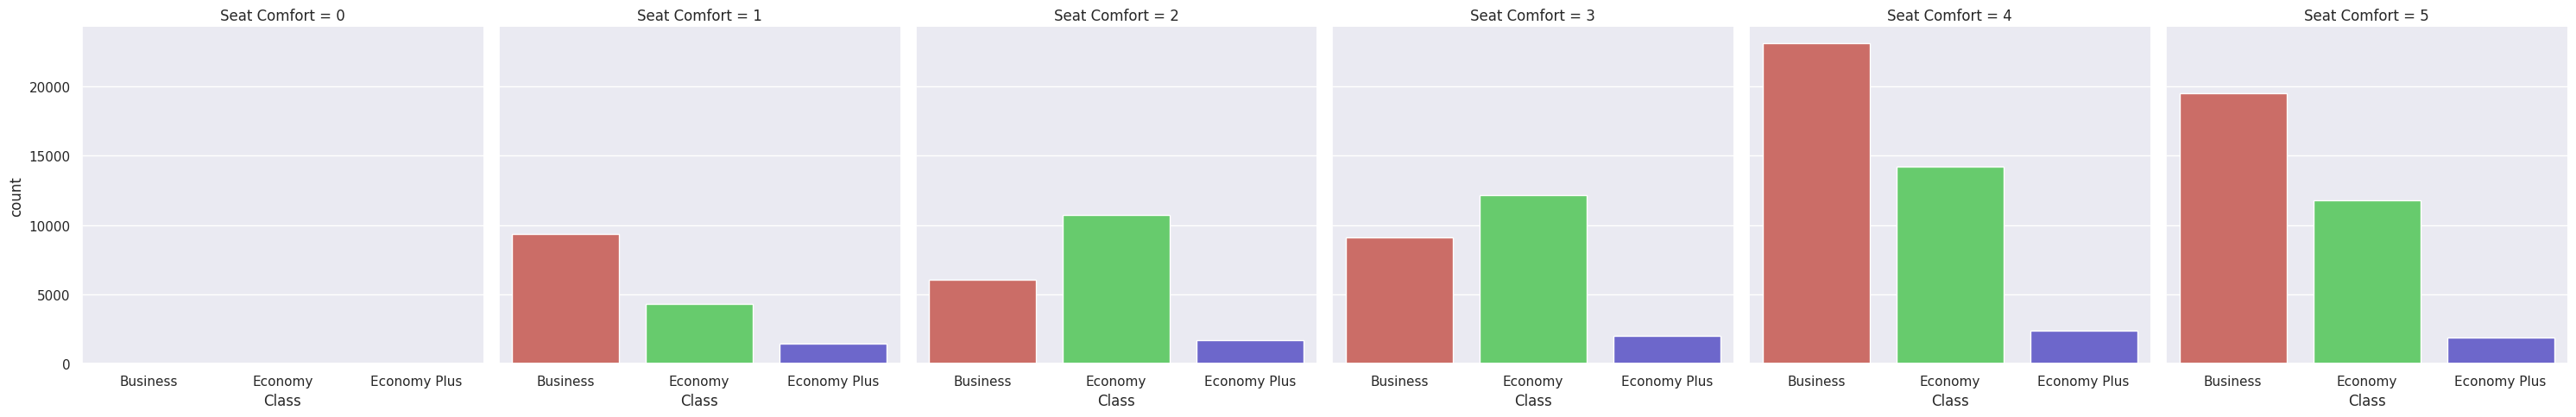

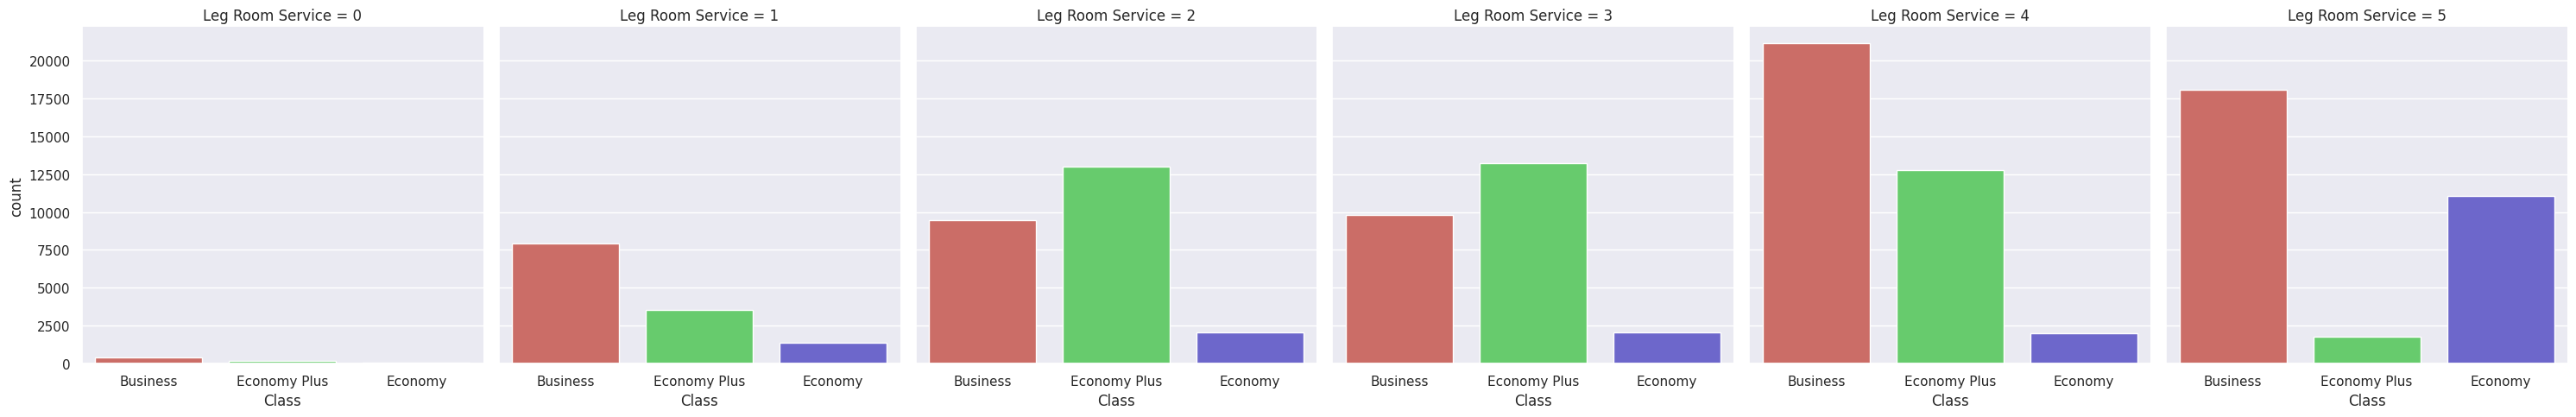

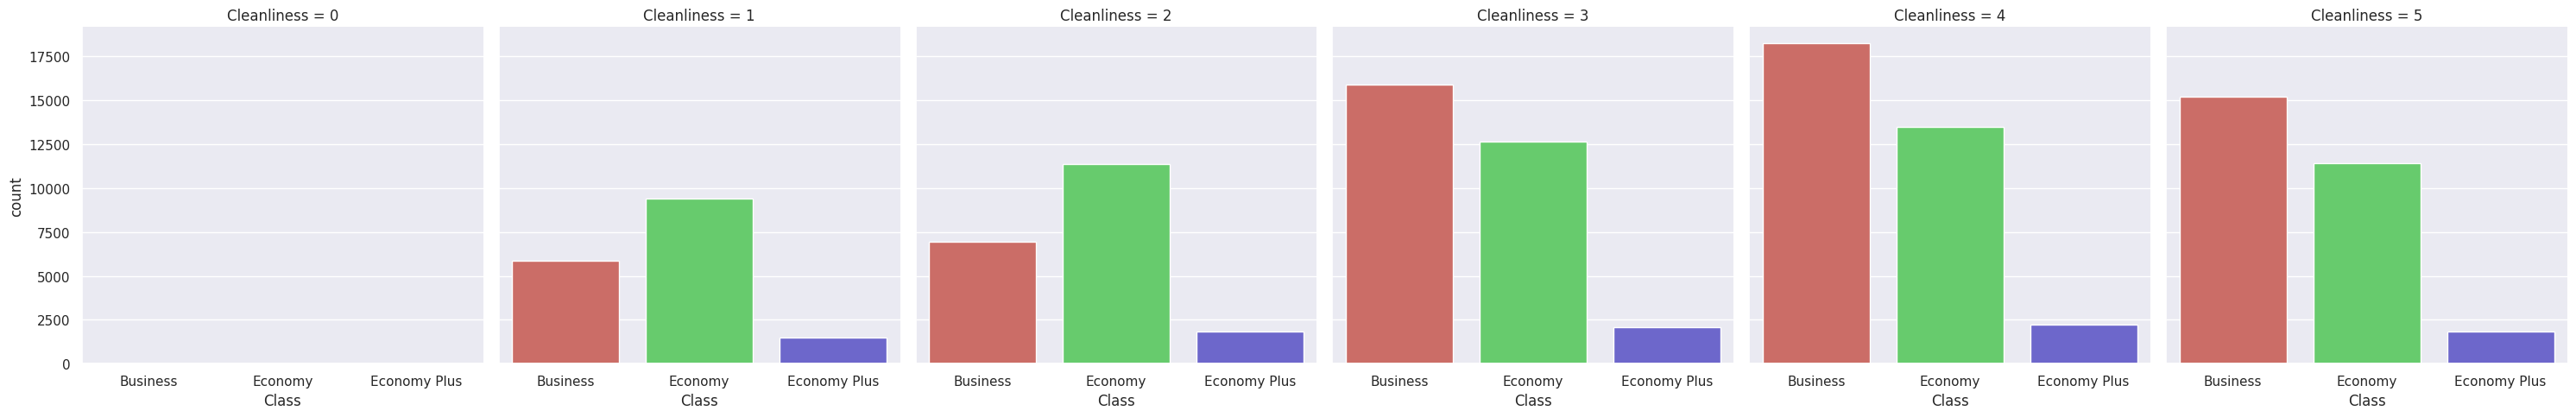

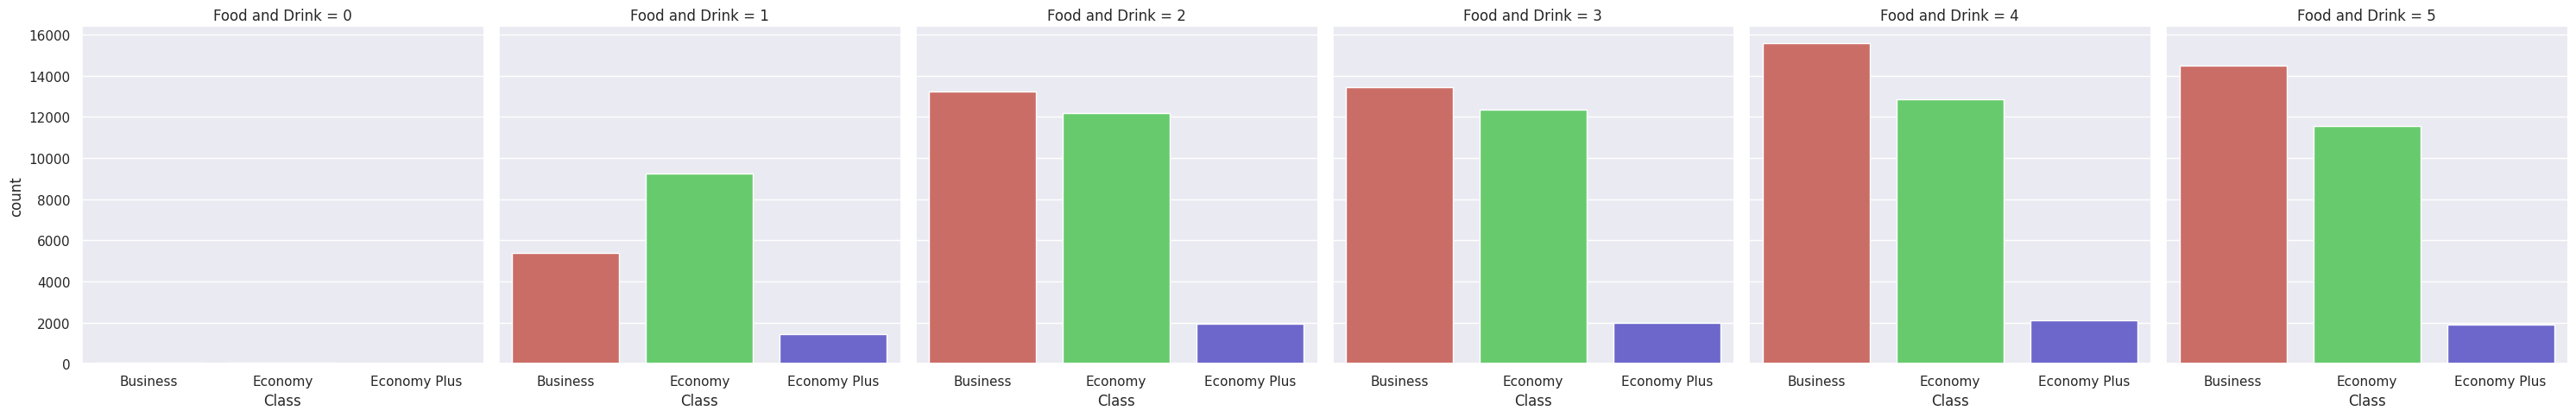

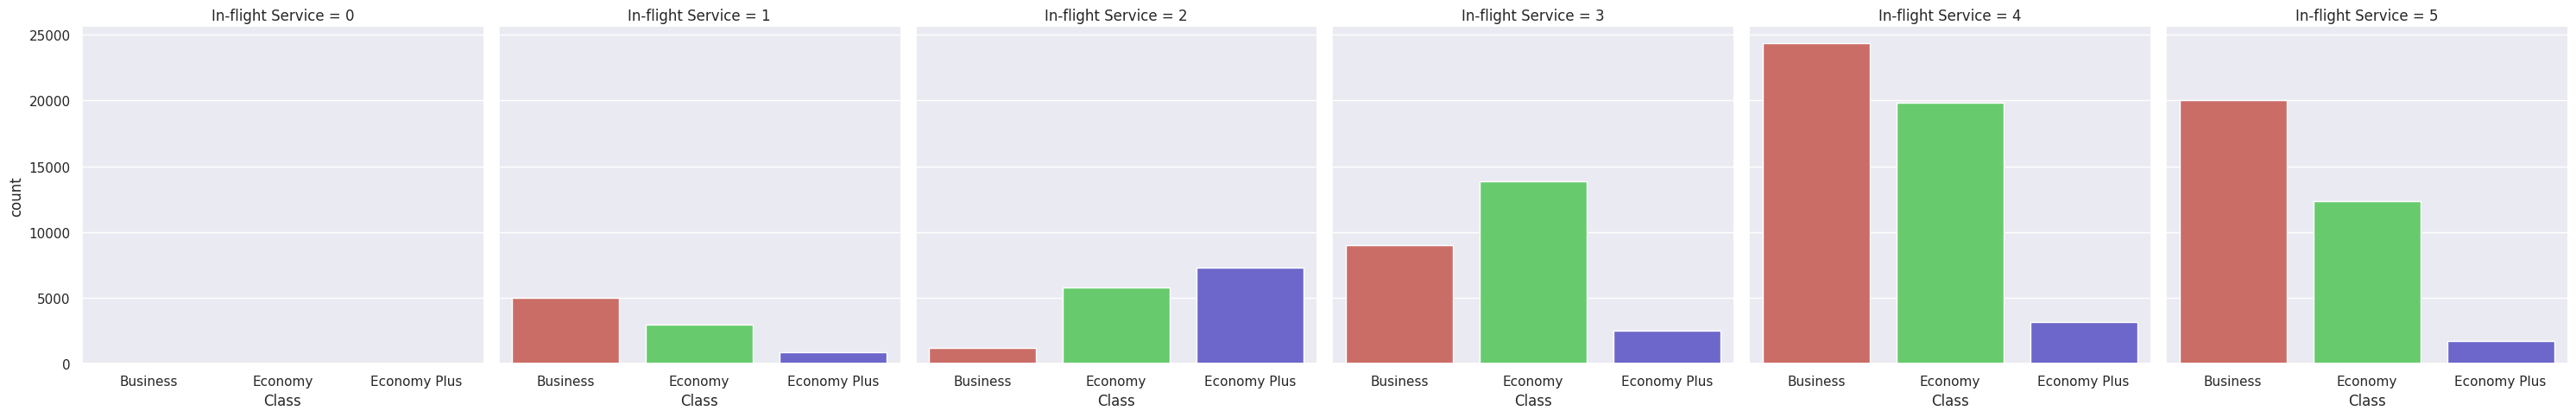

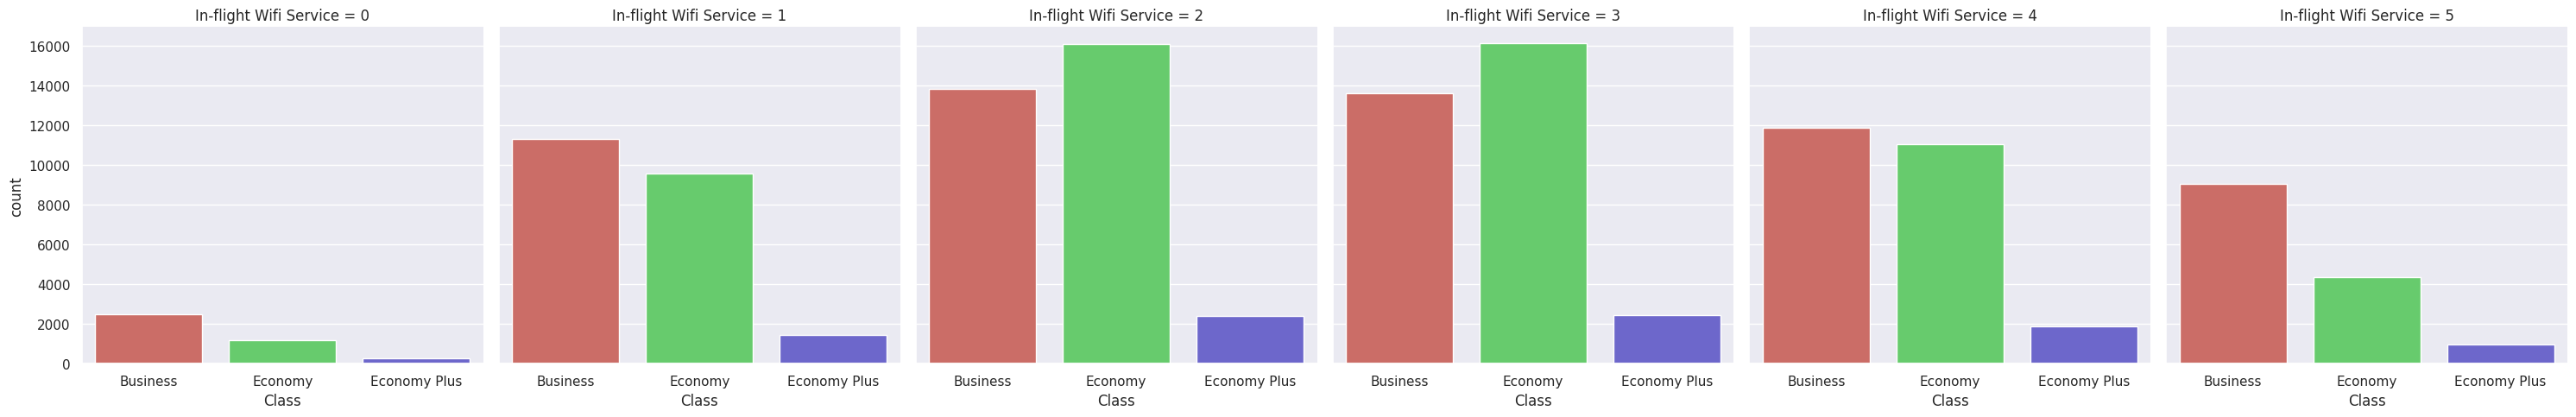

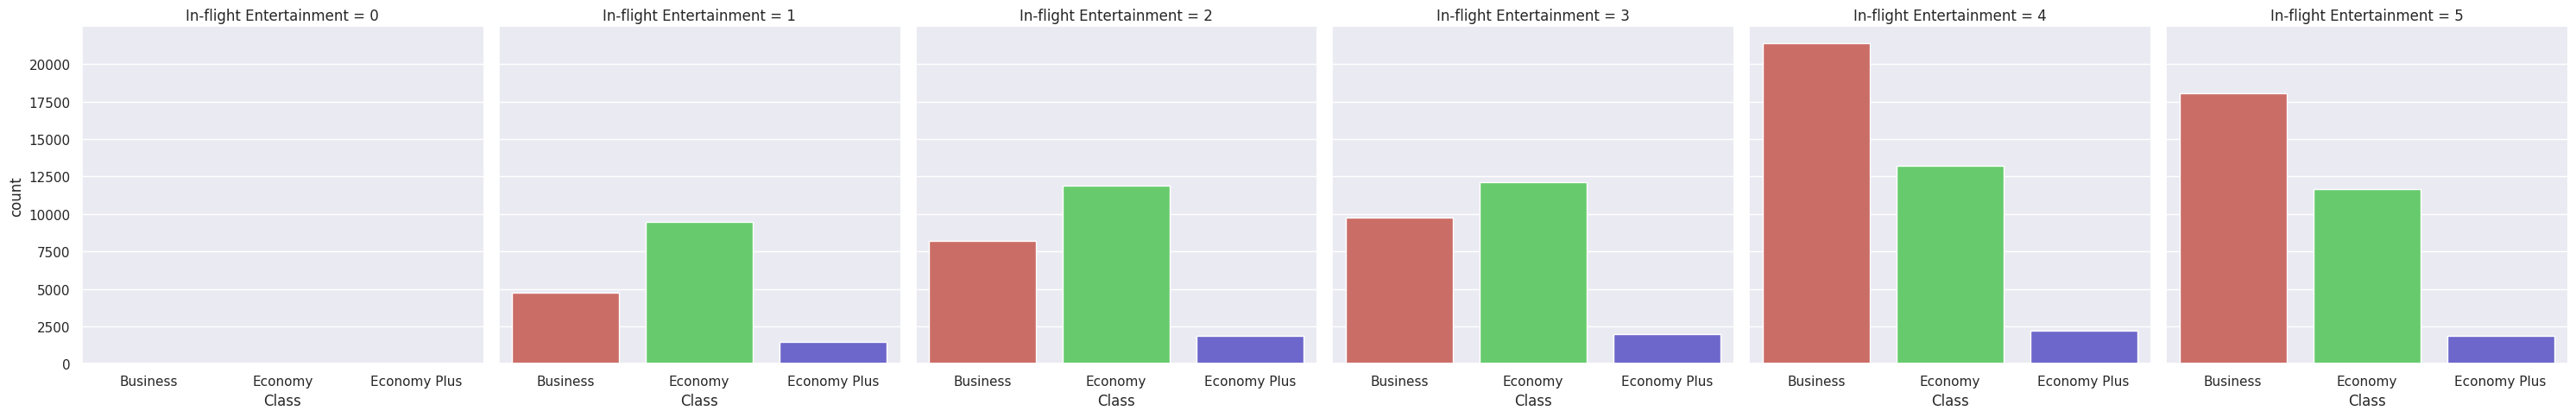

In [ ]:
non_continues = ['Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment']

for i in range(len(non_continues)):
    g = sb.FacetGrid(AirlineData, col= non_continues[i], height = 5)
    g.map_dataframe(sb.countplot, x="Class", palette = 'hls')   


<Axes: xlabel='Age', ylabel='count'>

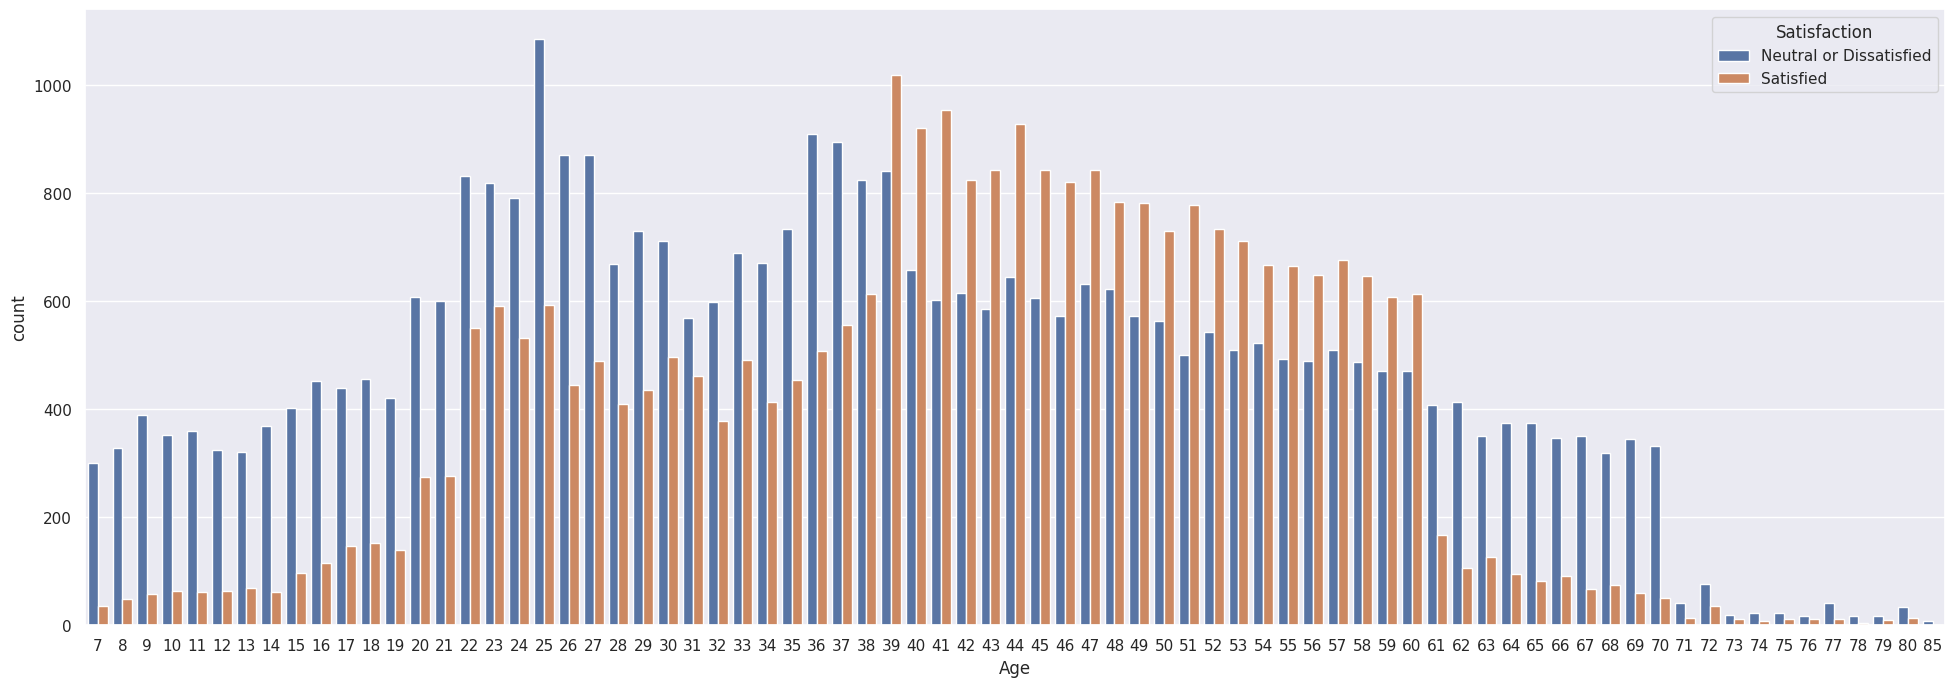

In [ ]:
df_new = AirlineData[AirlineData['Gender'] == 'Male']
f = plt.figure(figsize=(24, 8))
sb.countplot(x = "Age", hue ="Satisfaction", data = df_new)

<Axes: xlabel='Age', ylabel='count'>

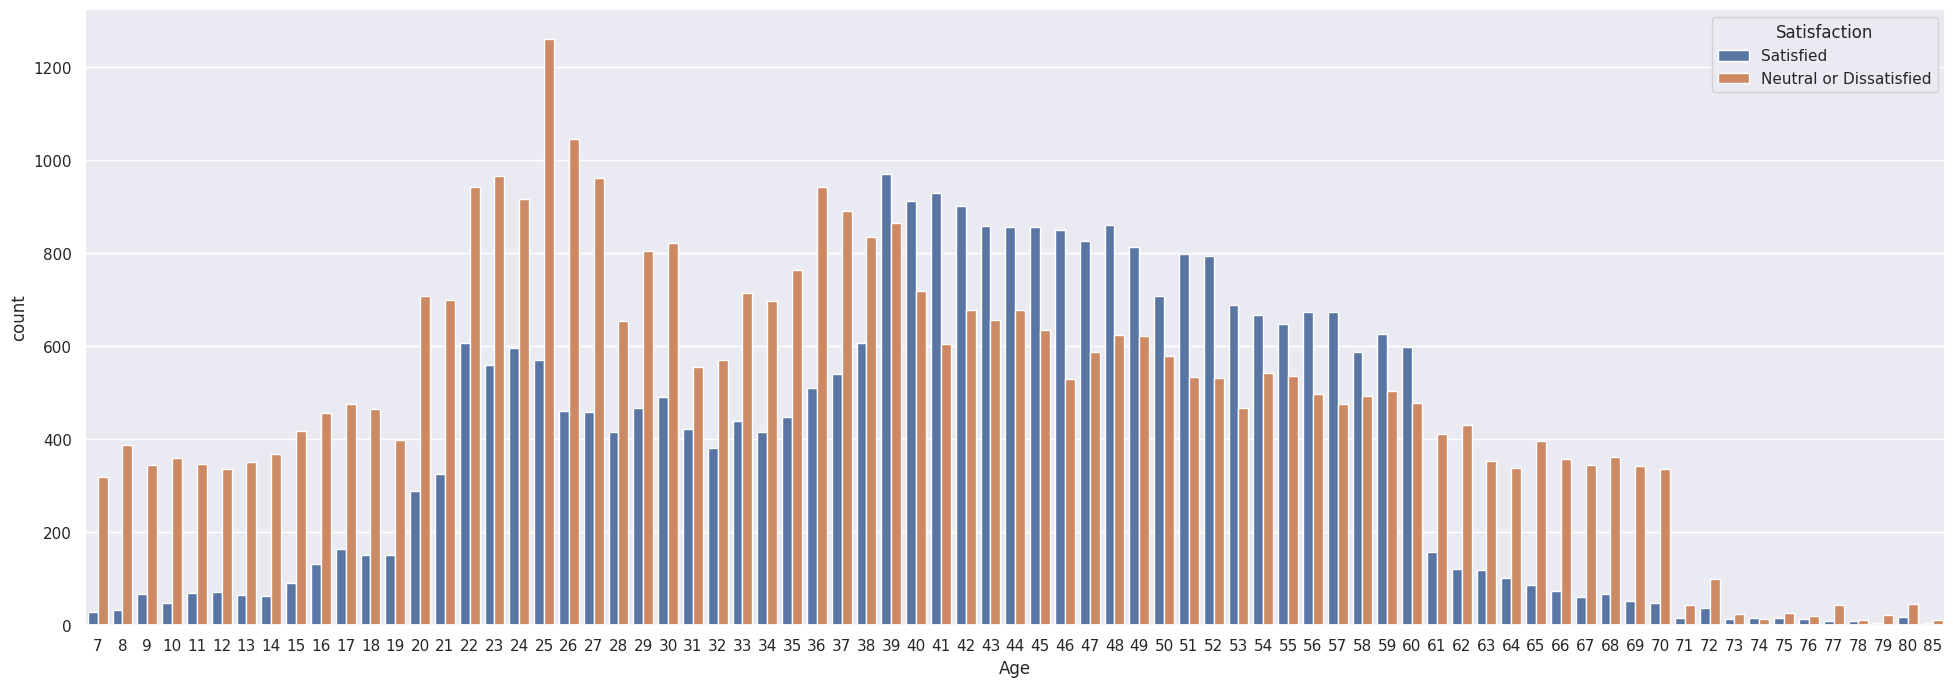

In [ ]:
df_new = AirlineData[AirlineData['Gender'] == 'Female']
f = plt.figure(figsize=(24, 8))
sb.countplot(x = "Age", hue ="Satisfaction", data = df_new)

we can say people from age group 39 - 60 expectations are high.

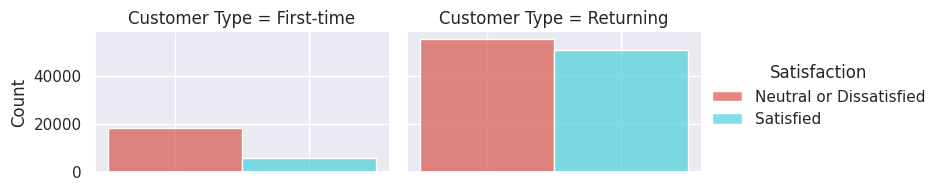

In [ ]:
#g = sb.FacetGrid(AirlineData, col="Customer_Type", height = 2.5, aspect  =1.5, hue ="Satisfaction" , palette = 'hls')
g = sb.FacetGrid(AirlineData, col="Customer Type", height = 2.5, aspect  =1.5, hue ="Satisfaction" , palette = 'hls')
g.map_dataframe(sb.histplot, x="Satisfaction")
g.set(xticklabels=[])  
g.set(xlabel=None)
g.add_legend()
# sb.countplot(x ='Customer Type', hue = "Satisfaction", data = AirlineData)
# plt.show()

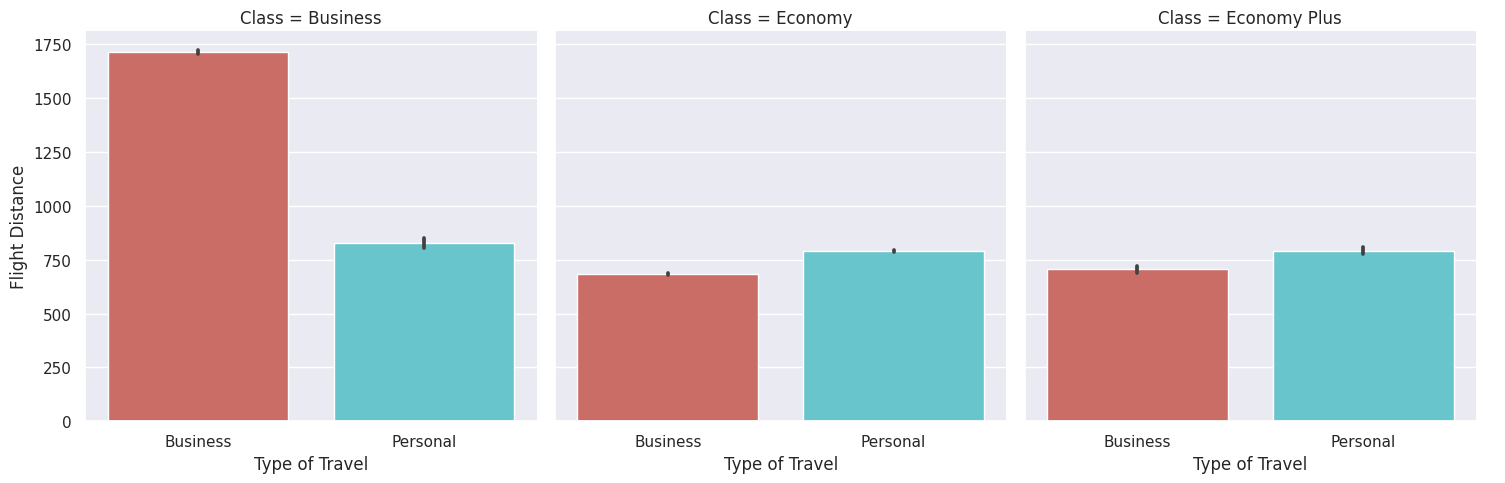

In [ ]:
g = sb.FacetGrid(AirlineData, col="Class", height = 5)
g.map_dataframe(sb.barplot, x="Type of Travel", y="Flight Distance",palette = 'hls')
g.add_legend()

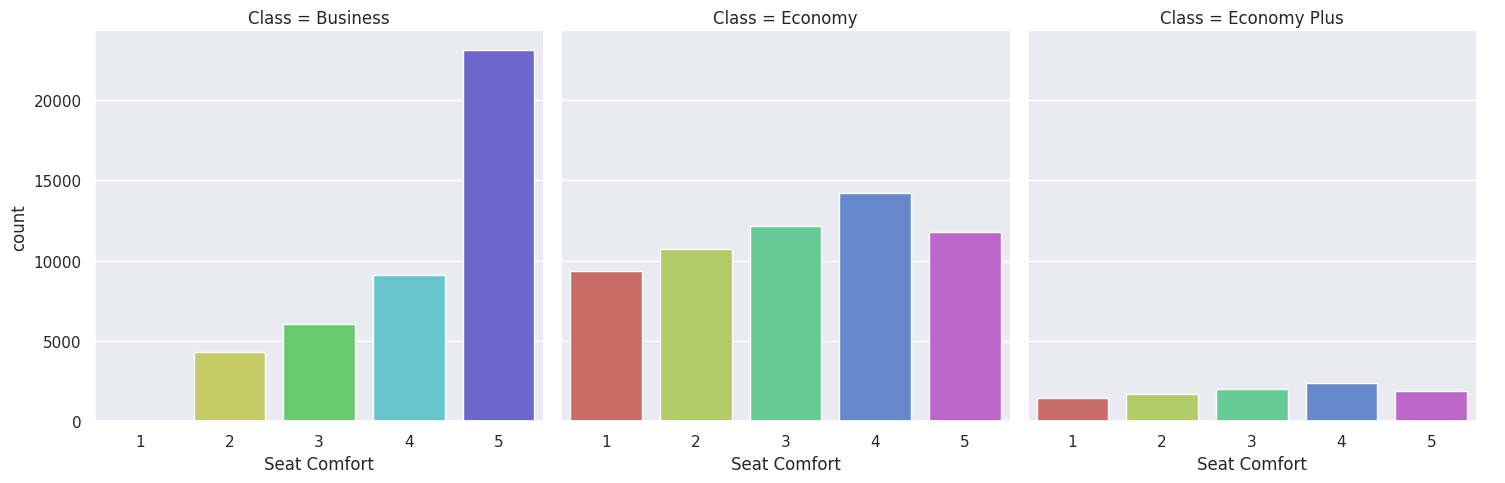

In [ ]:
g = sb.FacetGrid(AirlineData, col="Class", height = 5)
g.map_dataframe(sb.countplot, x="Seat Comfort",palette = 'hls')
g.add_legend()

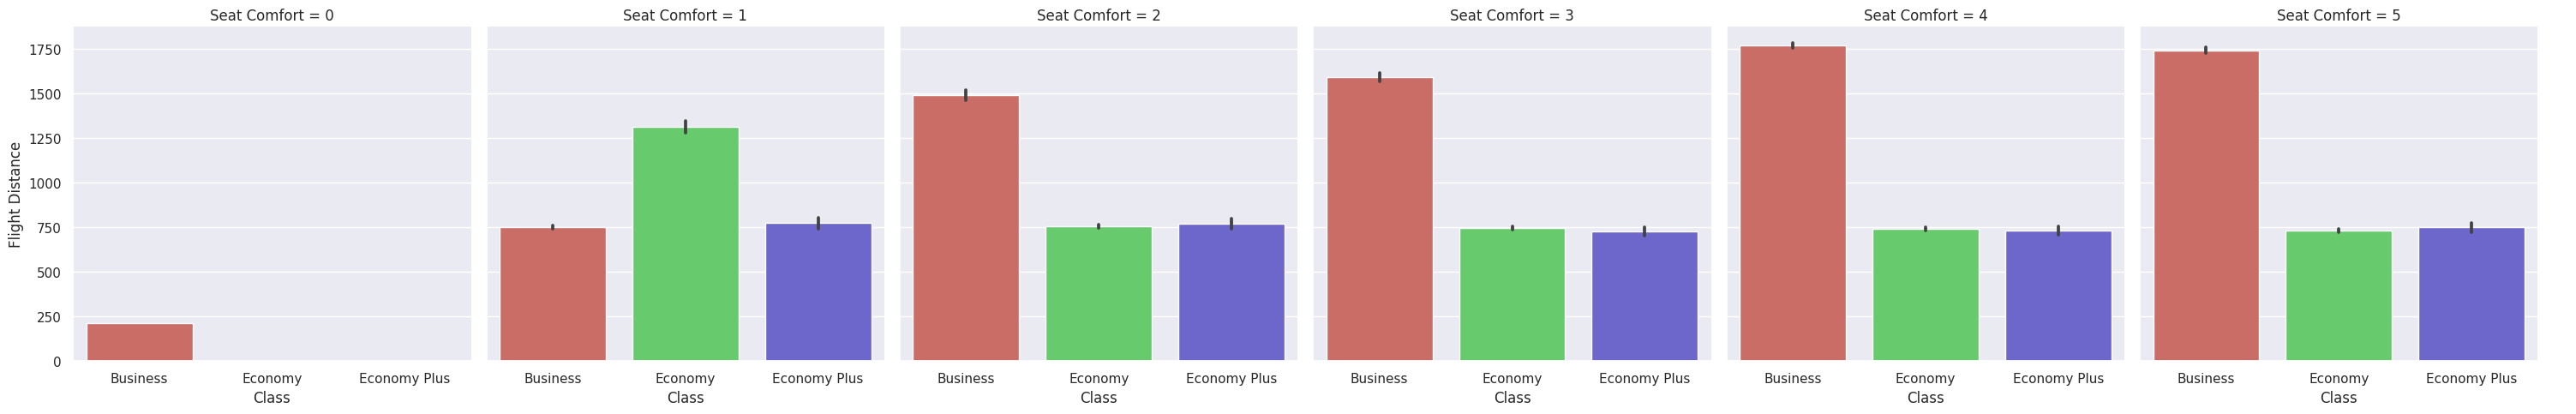

In [ ]:
g = sb.FacetGrid(AirlineData, col="Seat Comfort", height = 5)
g.map_dataframe(sb.barplot, x="Class", y = "Flight Distance" , palette = 'hls')
g.add_legend()

More to compare

In [ ]:
from pickleshare import print_function
AirlineData['Satisfaction'].replace({'Neutral or Dissatisfied': 0, 'Satisfied': 1},inplace = True)

total = AirlineData.isnull().sum().sort_values(ascending=False)
percent = (AirlineData.isnull().sum()/AirlineData.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head()

,Total,Percent
Arrival Delay,393,0.003026
Gender,0,0.000000
Gate Location,0,0.000000
Baggage Handling,0,0.000000
In-flight Entertainment,0,0.000000


In [ ]:
# Inputing missing value with mean 
AirlineData['Arrival Delay'] = AirlineData['Arrival Delay'].fillna(AirlineData['Arrival Delay'].mean())

<ipython-input-221-312141741667>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = AirlineData.corr()
<ipython-input-221-312141741667>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<Axes: >

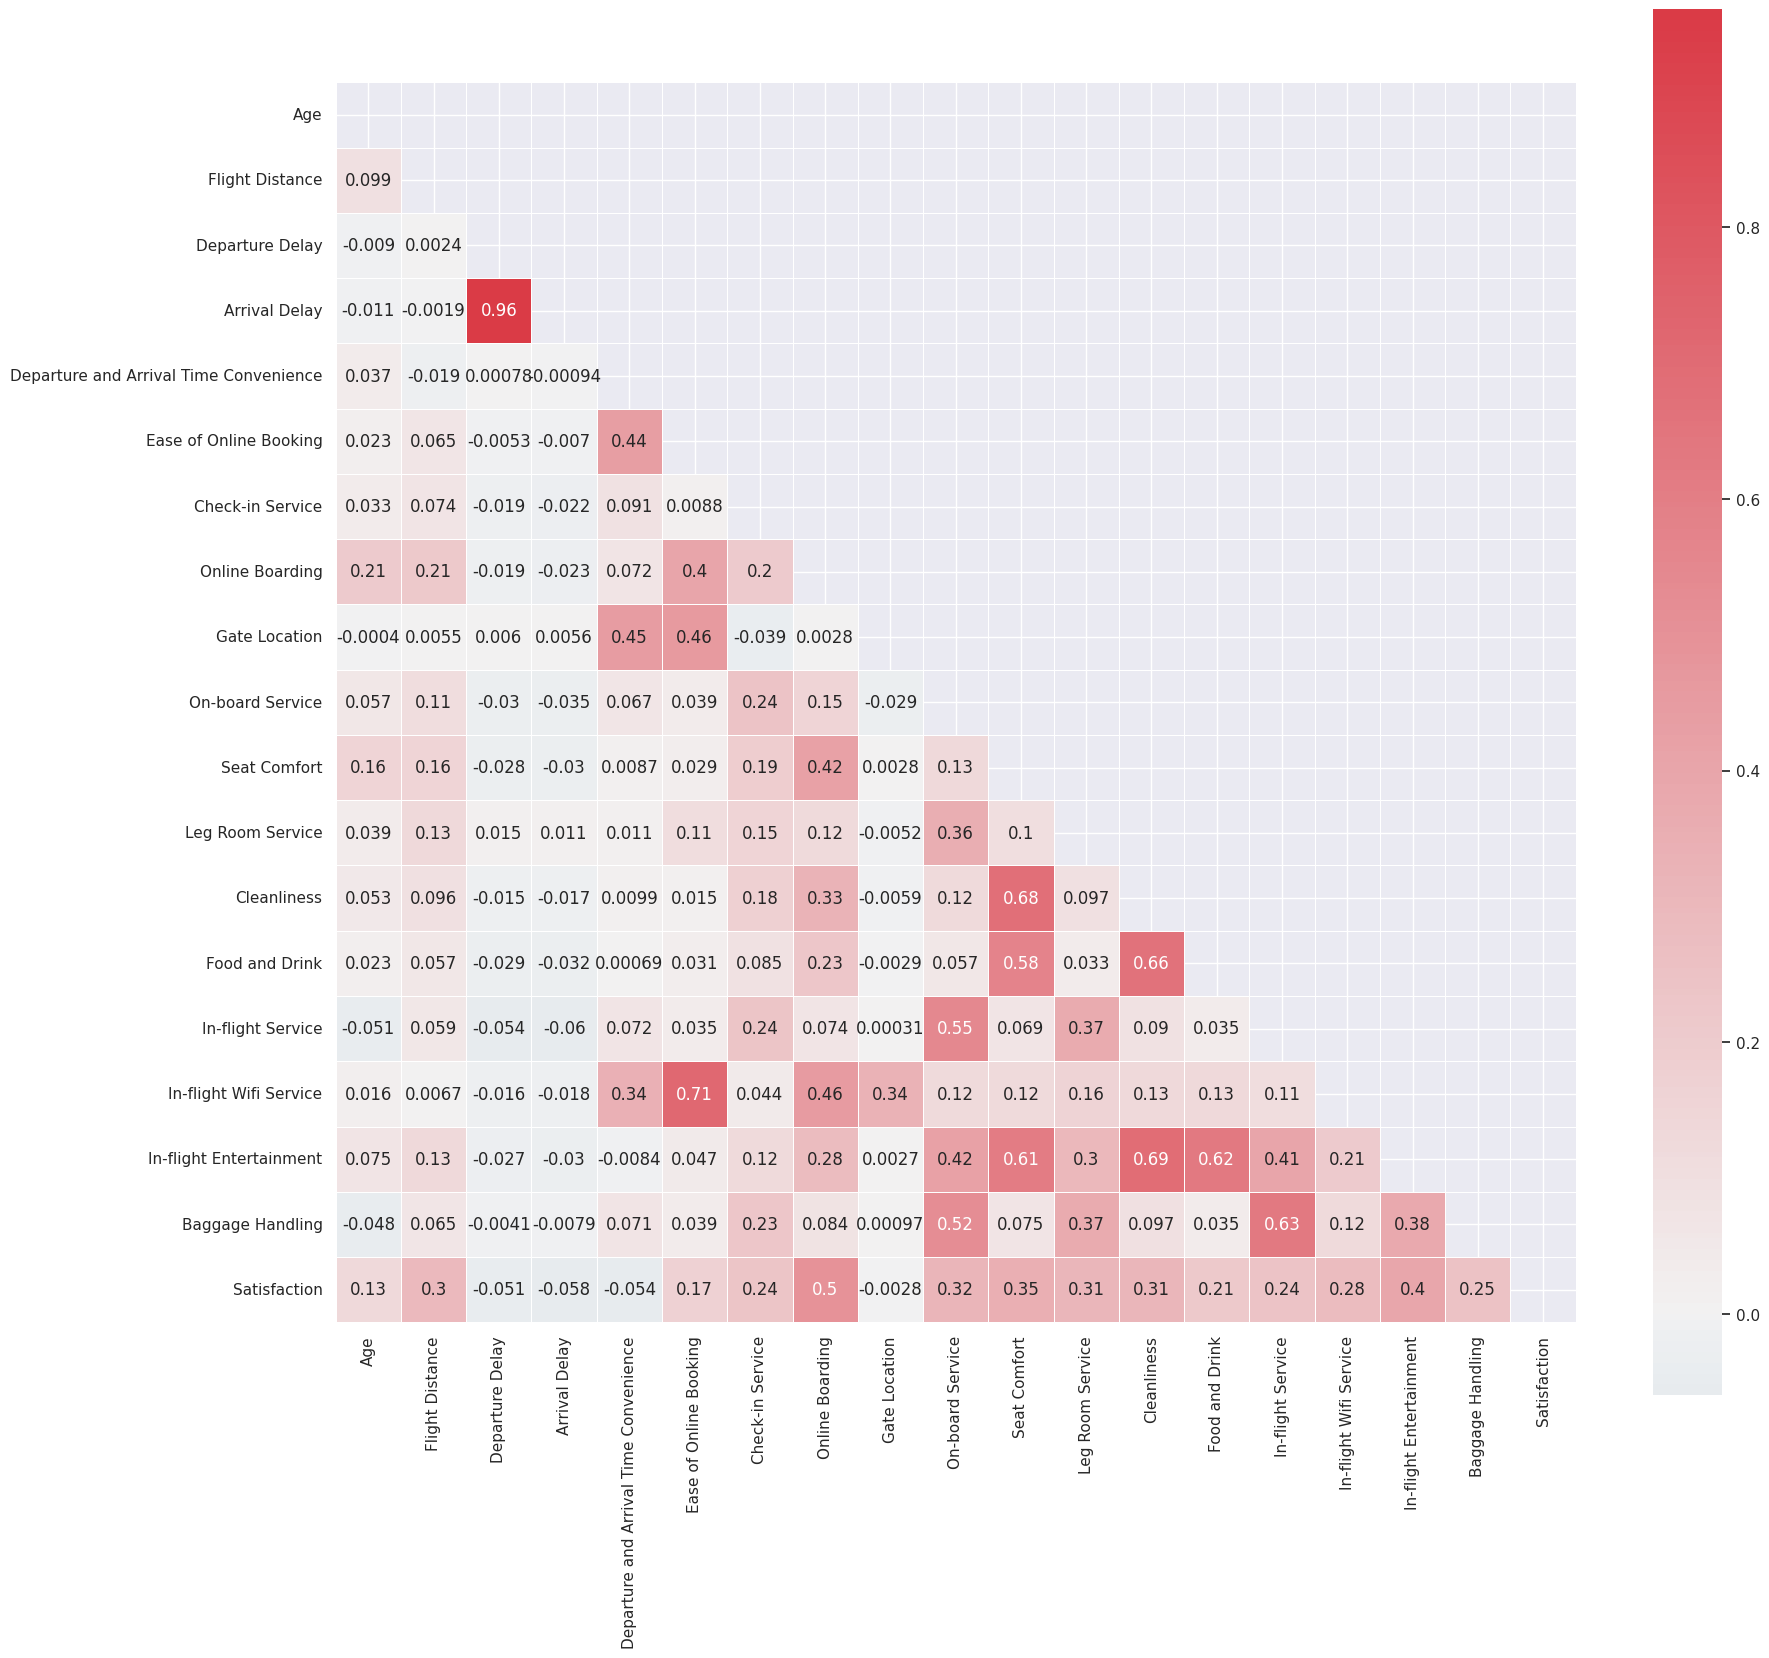

In [ ]:
corr = AirlineData.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sb.diverging_palette(240, 10, as_cmap=True)
sb.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

**Selection of top 10 features using Chi-Square**



In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2
for data in AirlineData.columns:
    if AirlineData[data].dtype=='object':
        l_en=LabelEncoder()  
        AirlineData[data] = l_en.fit_transform(AirlineData[data])
modelData = AirlineData.drop(['Age','Arrival Delay'],axis = 1)

In [ ]:
group_0_19 = AirlineData[AirlineData['Age'] < 20]
group_20_29 = AirlineData[(AirlineData['Age'] >= 20) & (AirlineData['Age'] <= 29)] 
group_30_39 = AirlineData[(AirlineData['Age'] >= 30) & (AirlineData['Age'] <= 39)]
group_40_49 = AirlineData[(AirlineData['Age'] >= 40) & (AirlineData['Age'] <= 49)]
group_50_59 = AirlineData[(AirlineData['Age'] >= 50) & (AirlineData['Age'] <= 59)]
group_60_69 = AirlineData[(AirlineData['Age'] >= 60) & (AirlineData['Age'] <= 69)]
group_70 = AirlineData[AirlineData['Age'] >= 70]

In [ ]:
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(modelData)
modified_data = pd.DataFrame(r_scaler.transform(modelData), columns=modelData.columns)

X = modified_data.loc[:,modified_data.columns!='Satisfaction']
y = modified_data[['Satisfaction']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])
print()


Index(['Type of Travel', 'Class', 'Flight Distance', 'Online Boarding',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'In-flight Wifi Service', 'In-flight Entertainment'],
      dtype='object')



**Importance of feature using Wrapper Method**

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

X = modified_data.loc[:,modified_data.columns!='Satisfaction']
y = modified_data[['Satisfaction']]
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
#print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

/usr/local/lib/python3.9/dist-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


['Type of Travel', 'Class', 'Online Boarding', 'Seat Comfort', 'In-flight Wifi Service', 'In-flight Entertainment']


**['Type of Travel', 'Class', 'Online Boarding', 'Seat Comfort', 'In-flight Wifi Service', 'In-flight Entertainment']**
Only these 6 features are inherently important in contributing towards the passenger satisfaction. Another feature importance deciding method is also used to cross check the results obtained in this method.

**Feature Permutation Importance**

In [ ]:
# !pip install eli5
# import eli5
# from eli5.sklearn import PermutationImportance
# from sklearn.ensemble import RandomForestClassifier as rf

# X = modified_data.loc[:,modified_data.columns!='Satisfaction']
# y = modified_data[['Satisfaction']]
# perm = PermutationImportance(rf(n_estimators=100, random_state=0).fit(X,y),random_state=1).fit(X,y)
# eli5.show_weights(perm, feature_names = X.columns.tolist())

From all the above results, we can conclude the list of important features that affects the customer or passenger satisfaction.
Most Important Features:
**Inflight_wifi_service, Type_of_Travel, Online_boarding, Class, Seat Comfort**

Other Important Features:
**Check-in_service, Baggage_handling, , In-Flight_Service, Cleanliness,  On-board_service, Leg_room_service, Flight_entertainment, In-flight Entertainment , Customer Type**

**Balancing**

In [ ]:
# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split
target = ['Satisfaction']
features = ['Type of Travel', 'Class', 'Flight Distance', 'Online Boarding',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'In-flight Wifi Service', 'In-flight Entertainment','Check-in Service','Baggage Handling','Customer Type']

In [ ]:
y = group_0_19[target]
X = group_0_19[features]
group_0_19_model = pd.concat([X, y], axis=1)
# Split the Dataset into Train and Test
X_train_0_19, X_test_0_19, y_train_0_19, y_test_0_19 = train_test_split(X, y, test_size = 0.3)

In [ ]:
y = group_20_29[target]
X = group_20_29[features]
group_20_29_model = pd.concat([X, y], axis=1)
# Split the Dataset into Train and Test
X_train_20_29, X_test_20_29, y_train_20_29, y_test_20_29 = train_test_split(X, y, test_size = 0.3)

In [ ]:
y = group_30_39[target]
X = group_30_39[features]
group_30_39_model = pd.concat([X, y], axis=1)
# Split the Dataset into Train and Test
X_train_30_39, X_test_30_39, y_train_30_39, y_test_30_39 = train_test_split(X, y, test_size = 0.3)

In [ ]:
y = group_40_49[target]
X = group_40_49[features]
group_40_49_model = pd.concat([X, y], axis=1)
# Split the Dataset into Train and Test
X_train_40_49, X_test_40_49, y_train_40_49, y_test_40_49 = train_test_split(X, y, test_size = 0.3)

In [ ]:
y = group_50_59[target]
X = group_50_59[features]
group_50_59_model = pd.concat([X, y], axis=1)
# Split the Dataset into Train and Test
X_train_50_59, X_test_50_59, y_train_50_59, y_test_50_59 = train_test_split(X, y, test_size = 0.3)

In [ ]:
y = group_60_69[target]
X = group_60_69[features]
group_60_69_model = pd.concat([X, y], axis=1)
# Split the Dataset into Train and Test
X_train_60_69, X_test_60_69, y_train_60_69, y_test_60_69 = train_test_split(X, y, test_size = 0.3)

In [ ]:
y = group_70[target]
X = group_70[features]
group_70_model = pd.concat([X, y], axis=1)
# Split the Dataset into Train and Test
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X, y, test_size = 0.3)

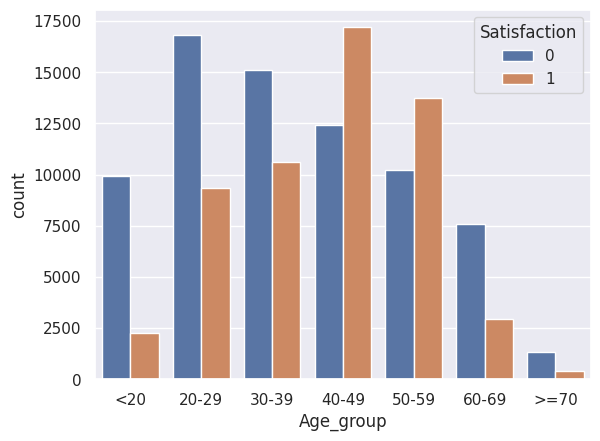

In [ ]:
def age_category(df):
    df["Age_group"] = pd.cut(x=df['Age'], bins=[0,19,29,39,49,59,69,100], labels=["<20","20-29","30-39","40-49","50-59","60-69",">=70"])
    return df
# Call function
AirlineData = age_category(AirlineData)
sb.countplot(x ='Age_group', hue = "Satisfaction", data = AirlineData)
plt.show()

In [ ]:
def balancing0(dataframe):
    # Class count
    satisfaction_class_0, satisfaction_class_1 = dataframe.Satisfaction.value_counts()
    # Divide by class
    df_satisfaction_0 = dataframe[dataframe['Satisfaction'] == 0]
    df_satisfaction_1 = dataframe[dataframe['Satisfaction'] == 1]

    df_satisfaction_1_over = df_satisfaction_1.sample(satisfaction_class_0, replace=True)
    dataframe = pd.concat([df_satisfaction_0, df_satisfaction_1_over], axis=0)
    return dataframe


In [ ]:
def balancing1(dataframe):
    # Class count
    satisfaction_class_1, satisfaction_class_0 = dataframe.Satisfaction.value_counts()
    # Divide by class
    df_satisfaction_0 = dataframe[dataframe['Satisfaction'] == 0]
    df_satisfaction_1 = dataframe[dataframe['Satisfaction'] == 1]

    df_satisfaction_0_over = df_satisfaction_0.sample(satisfaction_class_1, replace=True)
    dataframe = pd.concat([df_satisfaction_1, df_satisfaction_0_over], axis=0)
    return dataframe


In [ ]:
group_0_19_model = balancing0(group_0_19_model)
group_20_29_model = balancing0(group_20_29_model)
group_30_39_model = balancing0(group_30_39_model)
group_40_49_model = balancing1(group_40_49_model)
group_50_59_model = balancing1(group_50_59_model)
group_60_69_model = balancing0(group_60_69_model)
group_70_model = balancing0(group_70_model)

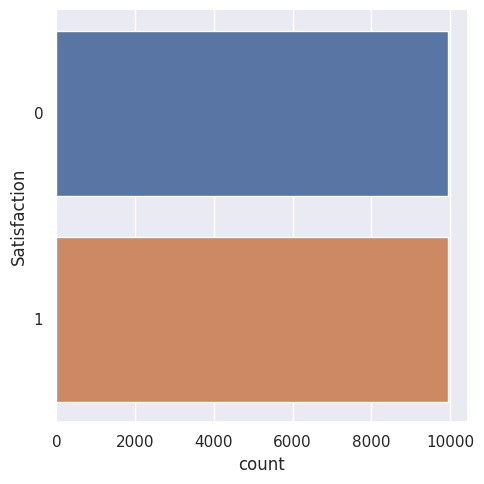

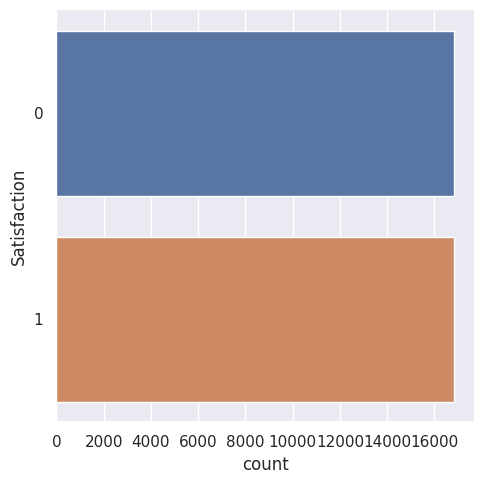

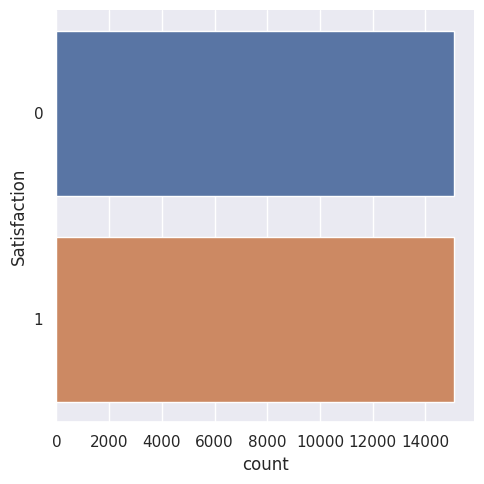

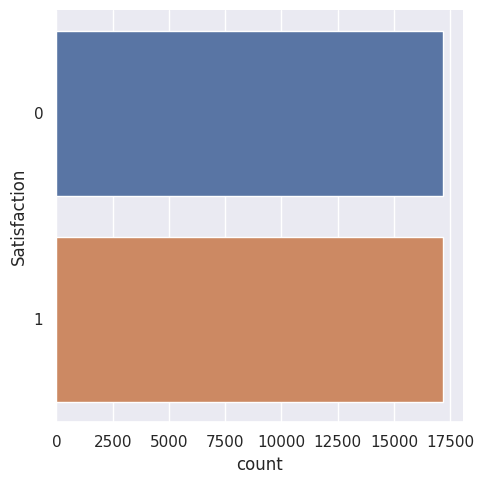

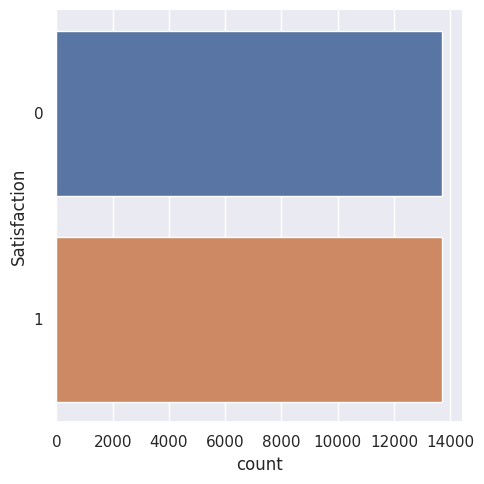

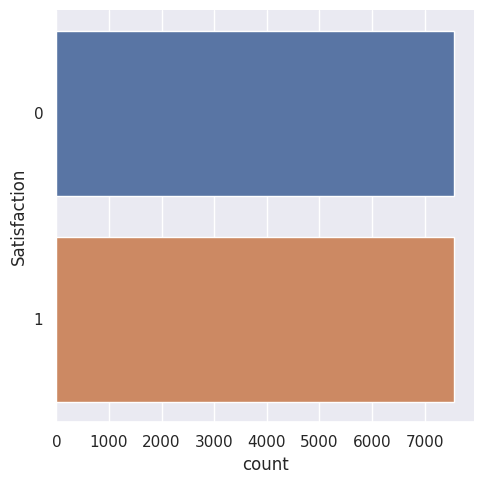

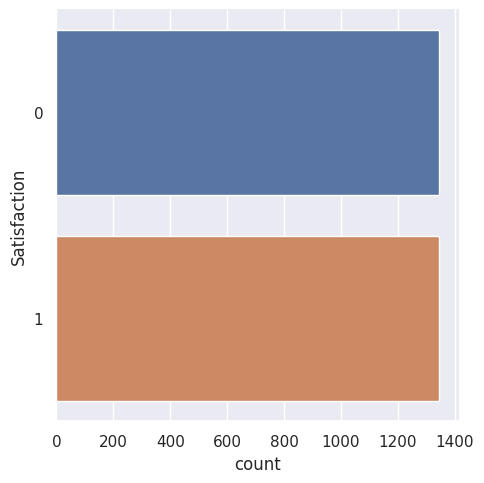

In [ ]:
groups = [group_0_19_model,group_20_29_model,group_30_39_model,group_40_49_model,group_50_59_model,group_60_69_model,group_70_model]
for group in groups:
  sb.catplot(y = "Satisfaction", data = group, kind = "count") 
plt.tight_layout()


**lazypredict**
At this stage, we didn't know how to choose an algorithm when training a Machine Learning model, so we decided to use the Lazy Predict library in Python to compare the performance of different Machine Learning models based on classification.




In [ ]:
!pip install lazypredict
from lazypredict.Supervised import LazyClassifier

In [ ]:
clf = LazyClassifier(verbose=0,
                     ignore_warnings=True, 
                     custom_metric=None)
models, predictions = clf.fit(X_train_0_19, X_test_0_19, y_train_0_19, y_test_0_19)
models

In [ ]:
clf = LazyClassifier(verbose=0,
                     ignore_warnings=True, 
                     custom_metric=None)
models, predictions = clf.fit(X_train_20_29, X_test_20_29, y_train_20_29, y_test_20_29)
models

In [ ]:
clf = LazyClassifier(verbose=0,
                     ignore_warnings=True, 
                     custom_metric=None)
models, predictions = clf.fit(X_train_30_39, X_test_30_39, y_train_30_39, y_test_30_39)
models

In [ ]:
clf = LazyClassifier(verbose=0,
                     ignore_warnings=True, 
                     custom_metric=None)
models, predictions = clf.fit(X_train_40_49, X_test_40_49, y_train_40_49, y_test_40_49)
models

In [ ]:
clf = LazyClassifier(verbose=0,
                     ignore_warnings=True, 
                     custom_metric=None)
models, predictions = clf.fit(X_train_50_59, X_test_50_59, y_train_50_59, y_test_50_59)
models

In [ ]:
clf = LazyClassifier(verbose=0,
                     ignore_warnings=True, 
                     custom_metric=None)
models, predictions = clf.fit(X_train_60_69, X_test_60_69, y_train_60_69, y_test_60_69)
models

In [ ]:
clf = LazyClassifier(verbose=0,
                     ignore_warnings=True, 
                     custom_metric=None)
models, predictions = clf.fit(X_train_70, X_test_70, y_train_70, y_test_70)
models

From the results above, the performance of all classification models is ranked based on their performance. From these results, the top models with the best performance results will be taken for the Machine Learning model in this dataset. The models include:
**LGBMClassifier**
**XGBClassifier**
**RandomForestClassifier**
**(DecisionTreeClassifier)**

**DecisionTreeClassifier**

In [ ]:
# Import essential models and functions from sklearn
def decisionTree(dataframe):
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import confusion_matrix
    from sklearn.tree import plot_tree

    # Extract Response and Predictors
    y = pd.DataFrame(dataframe['Satisfaction'])
    X = pd.DataFrame(dataframe.drop('Satisfaction', axis = 1))

    # Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

    # Decision Tree using Train Data
    dectree = DecisionTreeClassifier(max_depth = 7)  
    dectree.fit(X_train, y_train)                    

    # Plot the trained Decision Tree
    f = plt.figure(figsize=(24,24))
    plot_tree(dectree, filled=True, rounded=True, 
              feature_names=X_train.columns, 
              class_names=["Neutral or Dissatisfied","Satisfaction"])
    plt.show()
    
    # Predict the Response corresponding to Predictors
    y_train_pred = dectree.predict(X_train)
    # Print the Classification Accuracy
    print("Train Data")
    print("Accuracy  :\t", dectree.score(X_train, y_train))
    # Print the Accuracy Measures from the Confusion Matrix
    cmTrain = confusion_matrix(y_train, y_train_pred)
    tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
    fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
    tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
    fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)
    print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
    print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
    print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
    print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))
    print()
    # Predict the Response corresponding to Predictors
    y_test_pred = dectree.predict(X_test)
    # Print the Classification Accuracy
    print("Test Data")
    print("Accuracy  :\t", dectree.score(X_test, y_test))
    # Print the Accuracy Measures from the Confusion Matrix
    cmTest = confusion_matrix(y_test, y_test_pred)
    tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
    fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
    tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
    fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)
    print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
    print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
    print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
    print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

    # Plot the Confusion Matrix for Train and Test
    f, axes = plt.subplots(1, 2, figsize=(12, 4))
    sb.heatmap(confusion_matrix(y_train, y_train_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 12}, ax = axes[0])
    sb.heatmap(confusion_matrix(y_test, y_test_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 12},  ax = axes[1])

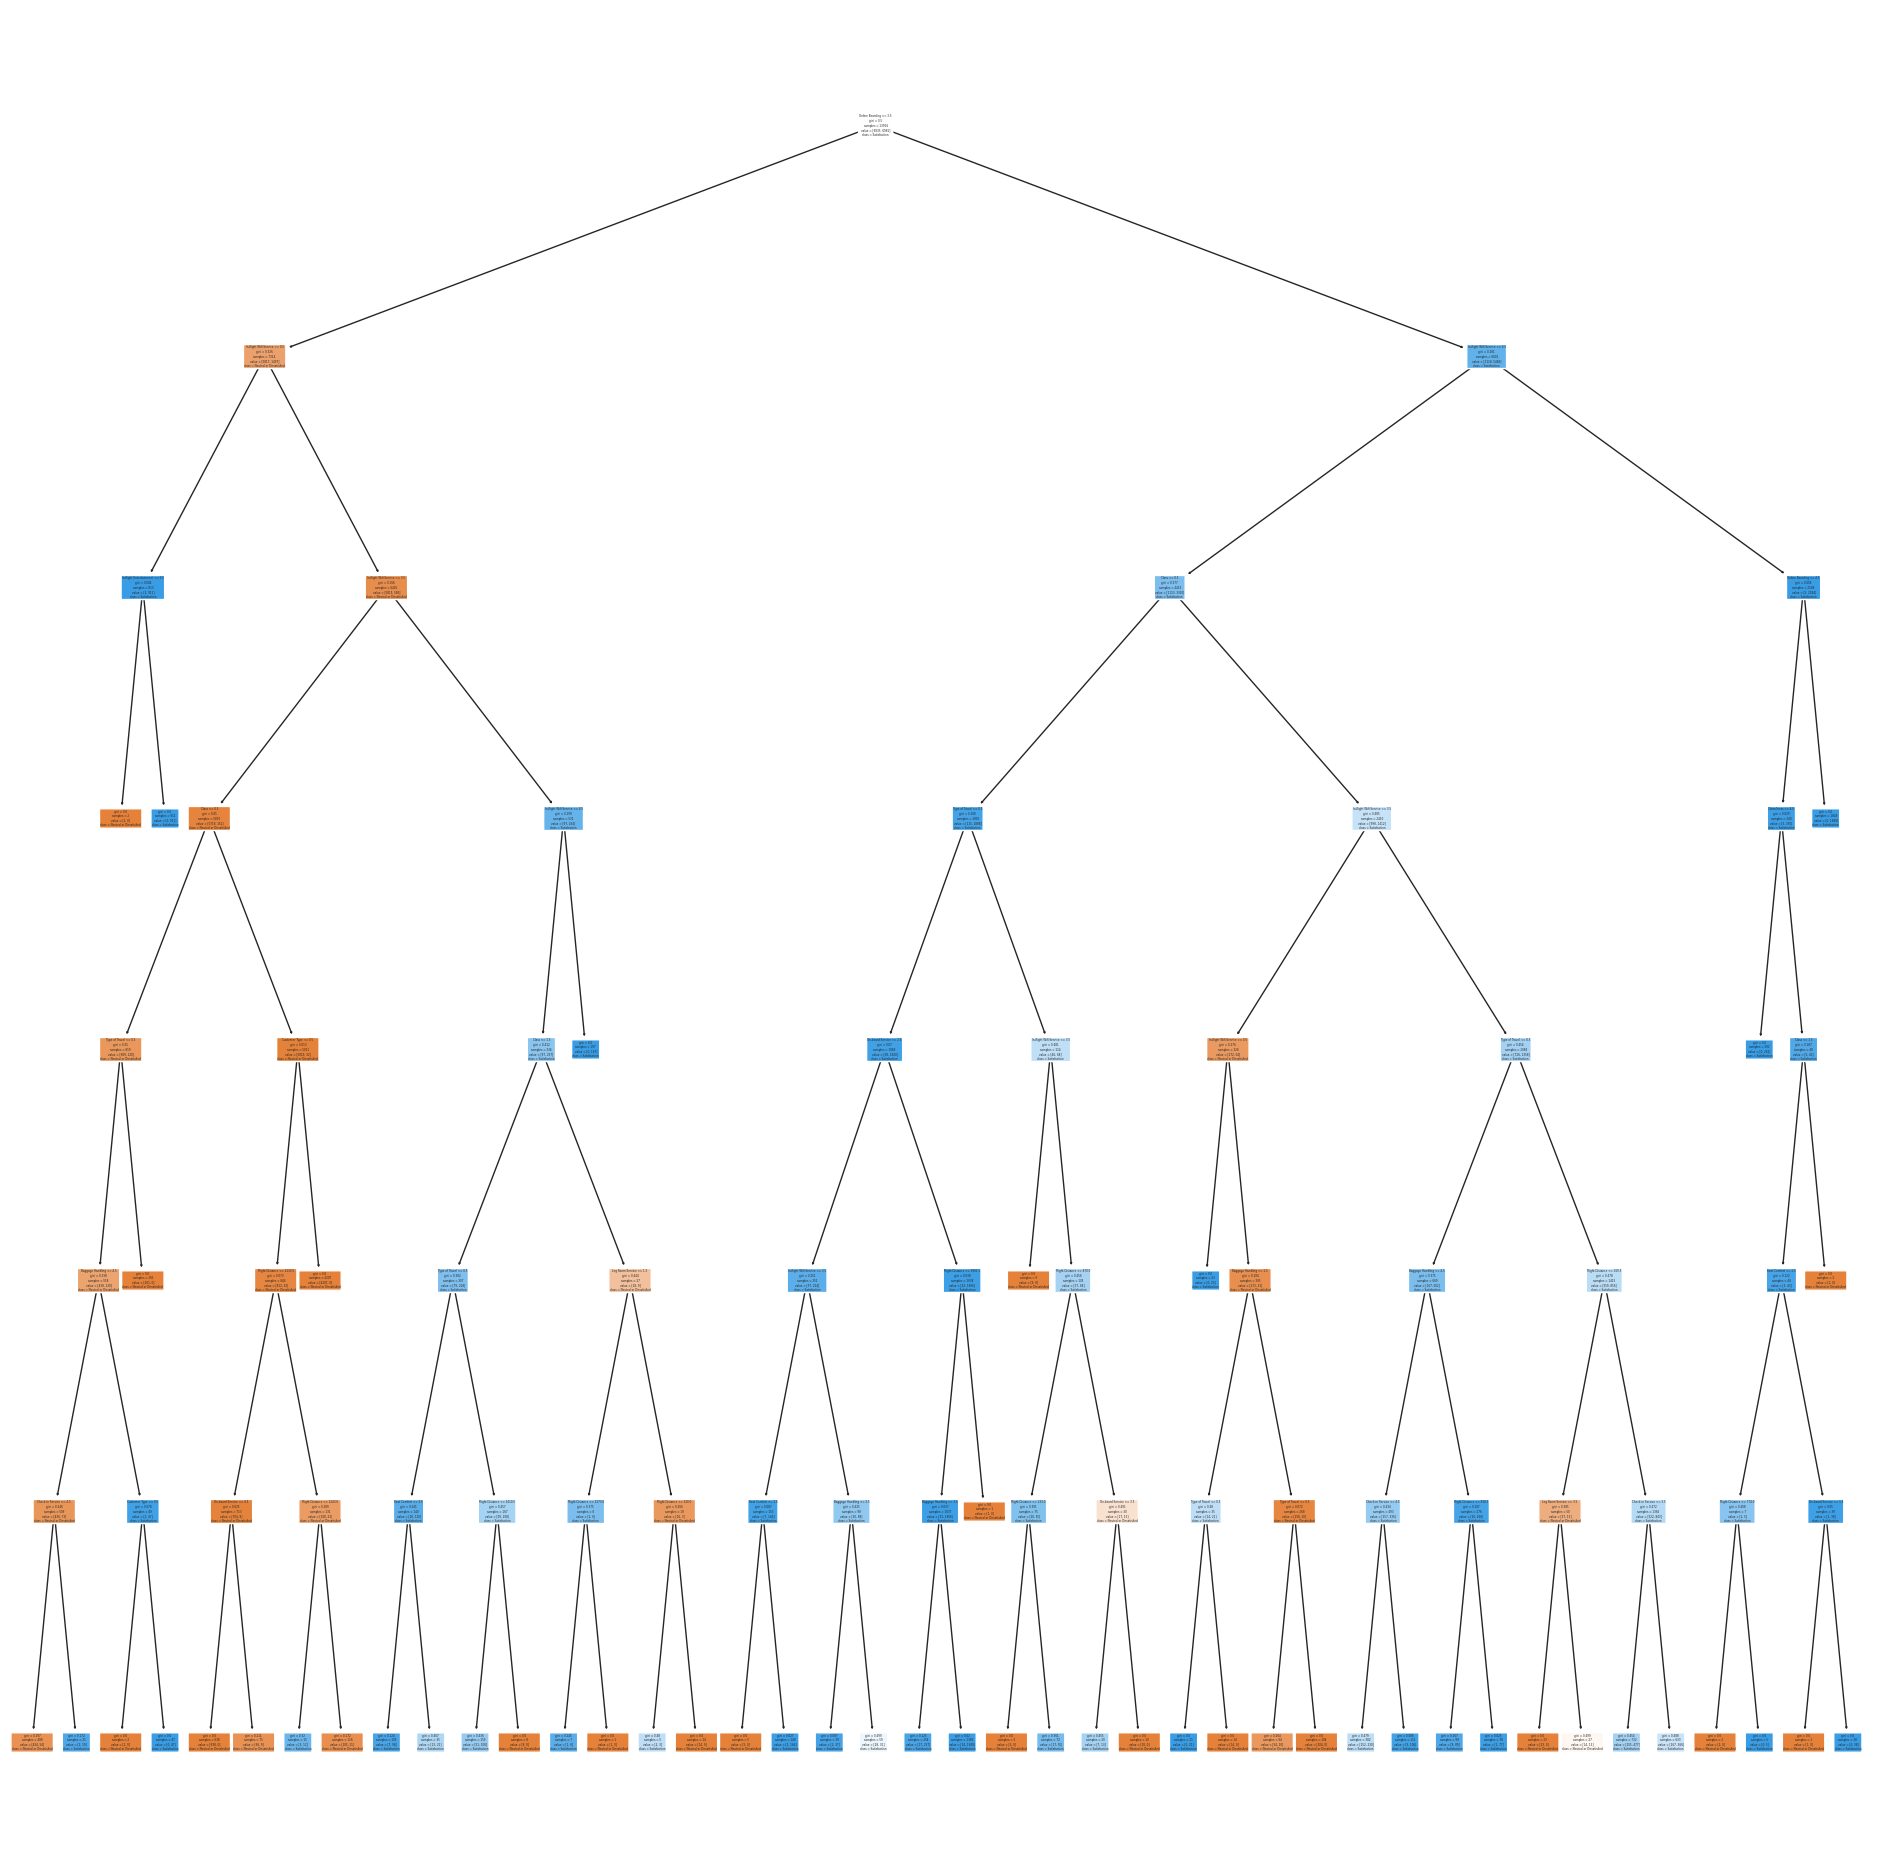

Train Data
Accuracy  :	 0.93158953722334
TPR Train :	 0.9861051425297236
TNR Train :	 0.8767123287671232
FPR Train :	 0.1232876712328767
FNR Train :	 0.013894857470276465

Test Data
Accuracy  :	 0.926391683433937
TPR Test :	 0.9861439675566069
TNR Test :	 0.8675540765391015
FPR Test :	 0.1324459234608985
FNR Test :	 0.013856032443393038


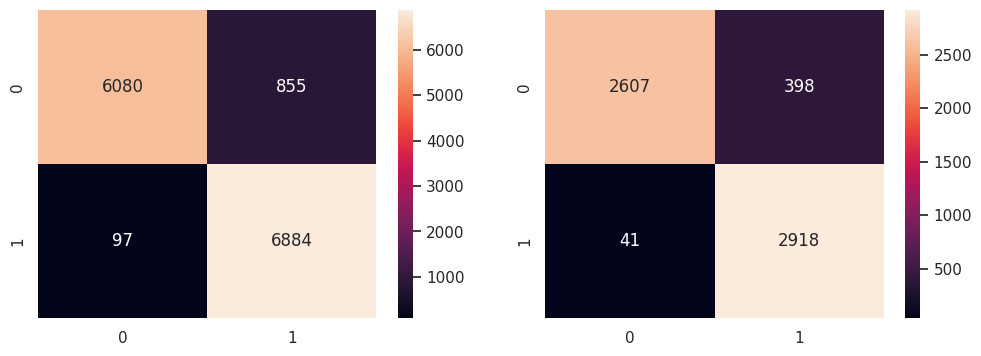

In [ ]:
decisionTree(group_0_19_model)

In [ ]:
decisionTree(group_20_29_model)

In [ ]:
decisionTree(group_30_39_model)

In [ ]:
decisionTree(group_40_49_model)

In [ ]:
decisionTree(group_50_59_model)

In [ ]:
decisionTree(group_60_69_model)

In [ ]:
decisionTree(group_70_model)

**LGBMClassifier:**

In [ ]:
def lgbmc(dataframe):
    import lightgbm as lgb
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    
    # Extract Response and Predictors
    y = pd.DataFrame(dataframe['Satisfaction'])
    X = pd.DataFrame(dataframe.drop('Satisfaction', axis = 1))

    # Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
    
    classification = lgb.LGBMClassifier()
    classification.fit(X_train, y_train)
    # predict the results
    y_train_pred = classification.predict(X_train)
    # Print the Classification Accuracy
    print("Train Data")
    print("Accuracy  :\t", classification.score(X_train, y_train))

    # Print the Accuracy Measures from the Confusion Matrix
    cmTrain = confusion_matrix(y_train, y_train_pred)
    tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
    fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
    tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
    fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

    print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
    print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
    print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
    print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))



    # Predict the Response corresponding to Predictors
    y_test_pred = classification.predict(X_test)

    # Print the Classification Accuracy
    print()
    print("Test Data")
    print("Accuracy  :\t", classification.score(X_test, y_test))

    # Print the Accuracy Measures from the Confusion Matrix
    cmTest = confusion_matrix(y_test, y_test_pred)
    tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
    fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
    tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
    fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

    print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
    print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
    print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
    print("FNR Test :\t", (fnTest/(fnTest + tpTest)))


    # Plot the Confusion Matrix for Train and Test
    f, axes = plt.subplots(1, 2, figsize=(12, 4))
    sb.heatmap(confusion_matrix(y_train, y_train_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 12}, ax = axes[0])
    sb.heatmap(confusion_matrix(y_test, y_test_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 12},  ax = axes[1])


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Train Data
Accuracy  :	 0.9760707099741305
TPR Train :	 0.9981262611703661
TNR Train :	 0.9541415878475208
FPR Train :	 0.04585841215247922
FNR Train :	 0.0018737388296339002

Test Data
Accuracy  :	 0.959926224010731
TPR Test :	 0.9926715522984677
TNR Test :	 0.9267386900742741
FPR Test :	 0.07326130992572587
FNR Test :	 0.0073284477015323115


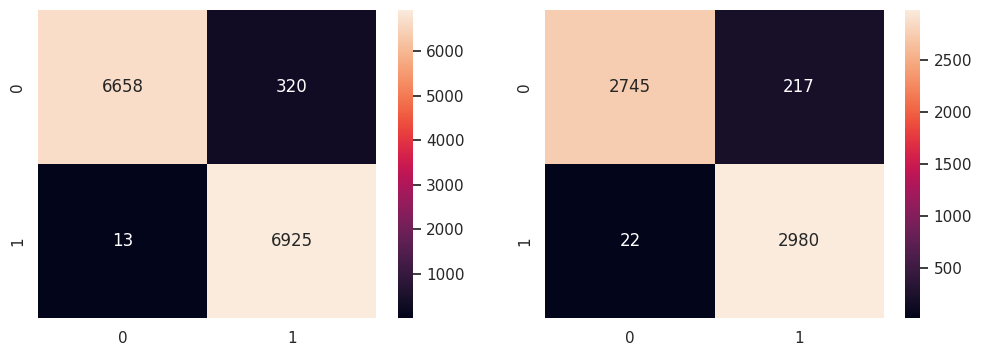

In [ ]:
lgbmc(group_0_19_model)

In [ ]:
lgbmc(group_20_29_model)

In [ ]:
lgbmc(group_30_39_model)

In [ ]:
lgbmc(group_40_49_model)

In [ ]:
lgbmc(group_50_59_model)

In [ ]:
lgbmc(group_60_69_model)

In [ ]:
lgbmc(group_70_model)

**RandomForest**

In [ ]:
def randomForest(dataframe, estim, mdepth):
    # Import essential models and functions from sklearn
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import confusion_matrix

    # Extract Response and Predictors
    y = pd.DataFrame(dataframe['Satisfaction'])
    X = pd.DataFrame(dataframe.drop('Satisfaction', axis = 1))


    # Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

    # Import RandomForestClassifier model from Scikit-Learn
    from sklearn.ensemble import RandomForestClassifier

    # Create the Random Forest object
    rforest = RandomForestClassifier(n_estimators = estim,  # n_estimators denote number of trees
                                     max_depth = mdepth)       # set the maximum depth of each tree

    # Fit Random Forest on Train Data
    rforest.fit(X_train, y_train.Satisfaction.ravel())

    # Predict the Response corresponding to Predictors
    y_train_pred = rforest.predict(X_train)
    y_test_pred = rforest.predict(X_test)

    # Print the Classification Accuracy
    print("Train Data")
    print("Accuracy  :\t", rforest.score(X_train, y_train))

    # Print the Accuracy Measures from the Confusion Matrix
    cmTrain = confusion_matrix(y_train, y_train_pred)
    tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
    fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
    tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
    fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

    print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
    print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
    print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
    print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

    # Predict the Response corresponding to Predictors
    y_test_pred = rforest.predict(X_test)

    # Print the Classification Accuracy
    print()
    print("Test Data")
    print("Accuracy  :\t", rforest.score(X_test, y_test))

    # Print the Accuracy Measures from the Confusion Matrix
    cmTest = confusion_matrix(y_test, y_test_pred)
    tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
    fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
    tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
    fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

    print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
    print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
    print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
    print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

    # Plot the Confusion Matrix for Train and Test
    f, axes = plt.subplots(1, 2, figsize=(12, 4))
    sb.heatmap(confusion_matrix(y_train, y_train_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 12}, ax = axes[0])
    sb.heatmap(confusion_matrix(y_test, y_test_pred), 
               annot = True, fmt=".0f", annot_kws={"size": 12}, ax = axes[1])
    
#     importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rforest.feature_importances_,3)})
#     importances = importances.sort_values('importance',ascending=False).set_index('feature')
#     importances.plot.bar()


Train Data
Accuracy  :	 0.9545846507617132
TPR Train :	 0.9909586681974741
TNR Train :	 0.9181059297639609
FPR Train :	 0.08189407023603915
FNR Train :	 0.009041331802525832

Test Data
Accuracy  :	 0.9382964453386988
TPR Test :	 0.9878869448183042
TNR Test :	 0.8890374331550802
FPR Test :	 0.11096256684491979
FNR Test :	 0.012113055181695828


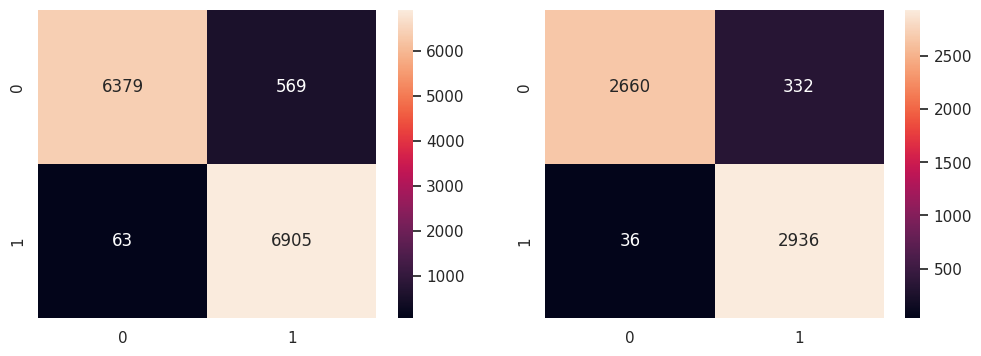

In [ ]:
randomForest(group_0_19_model,1000,10)

In [ ]:
randomForest(group_20_29_model,1000,10)

In [ ]:
randomForest(group_30_39_model,1000,10)

In [ ]:
randomForest(group_40_49_model,1000,10)

In [ ]:
randomForest(group_50_59_model,1000,10)

In [ ]:
randomForest(group_60_69_model,1000,10)

In [ ]:
randomForest(group_70_model,1000,10)

**Cross-Validation GridSearch Results**

In [ ]:
def best_hyperparameter(dataframe):
    # Import essential models and functions from sklearn
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import confusion_matrix
    # Import RandomForestClassifier model from Scikit-Learn
    from sklearn.ensemble import RandomForestClassifier

    # Extract Response and Predictors
    y = pd.DataFrame(dataframe['Satisfaction'])
    X = pd.DataFrame(dataframe.drop('Satisfaction', axis = 1)) 

    # Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
    # Import GridSearch for hyperparameter tuning using Cross-Validation (CV)
    from sklearn.model_selection import GridSearchCV

    # Define the Hyper-parameter Grid to search on, in case of Random Forest
    param_grid = {'n_estimators': np.arange(100,1001,100),   # number of trees 100, 200, ..., 1000
                  'max_depth': np.arange(9, 14)}             # depth of trees

    # Create the Hyper-parameter Grid
    hpGrid = GridSearchCV(RandomForestClassifier(),   # the model family
                          param_grid,                 # the search grid
                          cv = 5,                     # 5-fold cross-validation
                          scoring = 'accuracy')       # score to evaluate

    # Train the models using Cross-Validation
    hpGrid.fit(X_train, y_train.Satisfaction.ravel())
    
    # Fetch the best Model or the best set of Hyper-parameters
    print(hpGrid.best_estimator_)

    # Print the score (accuracy) of the best Model after CV
    print(np.abs(hpGrid.best_score_))

In [ ]:
best_hyperparameter(group_0_19_model)

RandomForestClassifier(max_depth=13, n_estimators=400)
0.955734116412868


In [ ]:
best_hyperparameter(group_20_29_model)

In [ ]:
best_hyperparameter(group_30_39_model)

In [ ]:
best_hyperparameter(group_40_49_model)

In [ ]:
best_hyperparameter(group_50_59_model)

In [ ]:
best_hyperparameter(group_60_69_model)

In [ ]:
best_hyperparameter(group_70_model)

Train Data
Accuracy  :	 0.9811008910606496
TPR Train :	 0.9965397923875432
TNR Train :	 0.9657593123209169
FPR Train :	 0.034240687679083094
FNR Train :	 0.0034602076124567475

Test Data
Accuracy  :	 0.9592555331991952
TPR Test :	 0.9946737683089214
TNR Test :	 0.9233108108108108
FPR Test :	 0.07668918918918918
FNR Test :	 0.005326231691078562


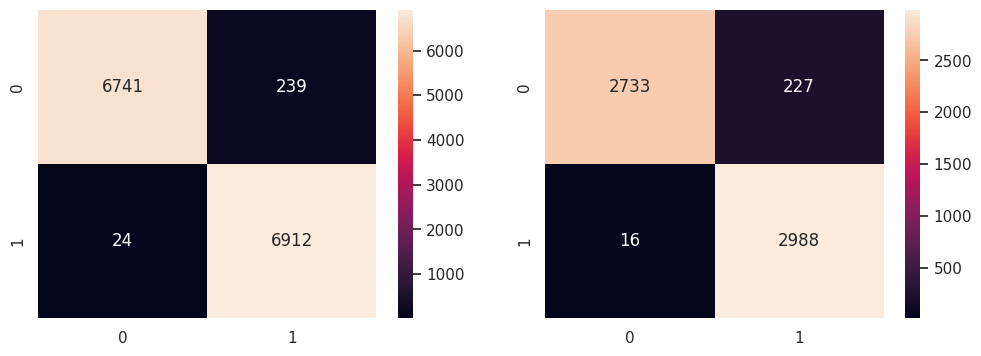

In [ ]:
randomForest(group_0_19_model,400,13)